In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['animation.ffmpeg_path']='/mnt/d/ffmpeg/bin/ffmpeg.exe'

## Model of HH disease



Reference: On the mathematical modelling of wound healing angiogenesis in skin as a reaction-transport process.

$$ \frac{\partial K}{\partial t} = -\textbf{c}\frac{\partial K}{\partial y}+\boldsymbol{\lambda} K(K-\textbf{a})(\textbf{b}-K)+\nabla\cdot(\textbf{D}K \nabla K) $$


TODO: Include derviation of model from conservation of mass

In [3]:
#numerical parameters for pde 
T=1000
dt=0.01
dx=0.01
width=150
height=100

N=np.meshgrid(np.array([range(0,width-2)]),np.array([range(0,height-1)]))[1]
M=N/height

#layer thicknesses
spinosum_layer_thickness=0.5
corneum_layer_thickness=0.1
air=1-spinosum_layer_thickness-corneum_layer_thickness

#initatiate layers
spinosum=M>=spinosum_layer_thickness
corneum=np.logical_and(M<1-spinosum_layer_thickness,M>1-spinosum_layer_thickness-corneum_layer_thickness)
air=np.logical_and(~spinosum,~corneum)

#spinosum parameters
a_spinosum=0.25
b_spinosum=0.5
lambda_spinosum=5
D_spinosum=0.0001
c_spinosum=0.1

#coreum parameters
a_corneum=0.001
b_corneum=1
lambda_corneum=5
D_corneum=0.0001
c_corneum=0.1

#air parameters
lambda_air=2
a_air=2
b_air=3
c_air=0.1


#speed of cell movement
c=c_spinosum*spinosum+c_corneum*corneum

a=a_spinosum*spinosum+a_corneum*a_spinosum+a_air*air
b=b_spinosum*spinosum+b_corneum*corneum+b_air*air
lam=lambda_spinosum*spinosum+lambda_corneum*corneum+lambda_air*air
D=D_corneum*corneum+D_spinosum*spinosum
c=c_corneum*corneum+c_spinosum*spinosum+c_air*air

#healthy_ratio=
#unhealthy_ratio=

#initialise H
#H=np.zeros([100,100])

In [4]:
def update_H(H):

    
    advection=c*(H[1:height,1:width-1]-H[0:height-1,1:width-1])/dx
    
    growth=lam*H[0:height-1,1:width-1]*(H[0:height-1,1:width-1]-a)*(b-H[0:height-1,1:width-1])
    
    dispersal=D*(H[0:height-1,0:width-2]*(H[0:height-1,0:width-2]-H[0:height-1,1:width-1])-H[0:height-1,2:width]*(H[0:height-1,1:width-1]-H[0:height-1,2:width]))# currently only in x direction
    dispersal=dispersal/(dx**2)
    
    dHbydt=advection + growth + dispersal
    dH=dHbydt*dt
    
    H[0:height-1,1:width-1]=H[0:height-1,1:width-1]+dH
    
    return H
    

## Varying boundary condition for diseased vs healthy epidermis


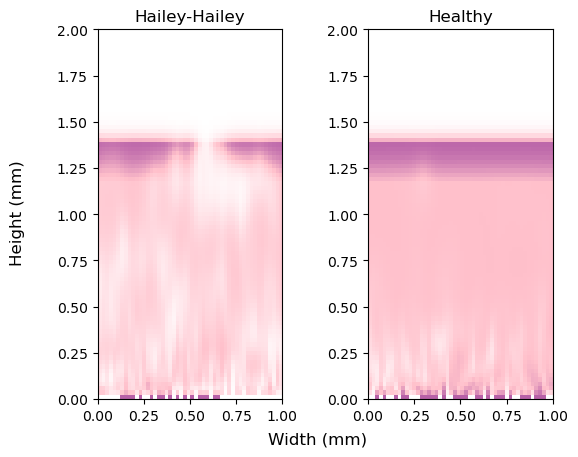

In [9]:


#H=np.zeros([height,width])
#H_unstable=np.zeros([height,width])

custom_cmap=LinearSegmentedColormap.from_list('custom',['white','pink','#b861a8'])
fig, axes = plt.subplots(nrows=1, ncols=2)



# add space for colour bar
#fig.subplots_adjust()

fig.colorbar(im2,label='Keratinocyte Density')
fig.supxlabel('Width (mm)')
fig.supylabel('Height (mm)')

axes[0].set_title('Hailey-Hailey')
axes[1].set_title('Healthy')

im1 = axes[0].imshow(H_unstable[25:height,50:100],extent=(0,1,0,2), cmap=custom_cmap)
im2 = axes[1].imshow(H[25:height,50:100], extent=(0,1,0,2), cmap=custom_cmap)



metadata = dict(title='Movie', artist='Jack')
writer = FFMpegWriter(fps=50,metadata=metadata)


with writer.saving(fig,'PDE_sim.gif',100):
    for i in range(1,T):
        H_unstable=update_H(H_unstable)
        H=update_H(H)
    
        cluster=16
        if i%5==0:
            H[height-1,0:width]=0
            H_unstable[height-1,0:width]=0
            
            cluster=16
            for n in np.random.randint(0,width-cluster,size=[6,]):
                H_unstable[height-1,n:n+cluster]=np.random.uniform(0,1,size=[cluster,])>0.5
                
            cluster=32
            for n in np.random.randint(0,width-cluster,size=[6,]):
                H[height-1,n:n+cluster]=np.random.uniform(0,1,size=[cluster,])>0.5
        
        
        im1.set_data(H_unstable[15:height,50:100])
        im2.set_data(H[15:height,50:100])
        writer.grab_frame()

Text(0.5, 1.0, 'Healthy')

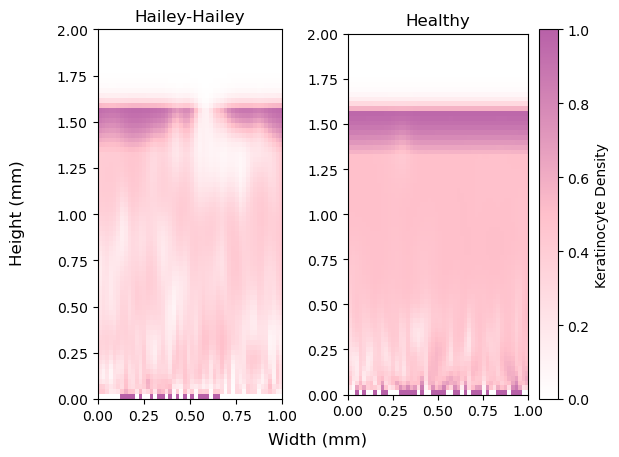

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)


# find minimum of minima & maximum of maxima
#minmin = np.min([np.min(data1), np.min(data2)])
#maxmax = np.max([np.max(data1), np.max(data2)])

im1 = axes[0].imshow(H_unstable[25:height,50:100],extent=(0,1,0,2), cmap=custom_cmap)
im2 = axes[1].imshow(H[25:height,50:100], extent=(0,1,0,2), cmap=custom_cmap)

# add space for colour bar
fig.subplots_adjust()

fig.colorbar(im2,label='Keratinocyte Density')
fig.supxlabel('Width (mm)')
fig.supylabel('Height (mm)')

axes[0].set_title('Hailey-Hailey')
axes[1].set_title('Healthy')

In [12]:
import imageio.v2 as iio

# read an image
HHD = iio.imread("Screenshot 2023-03-13 140626.png")
healthy =iio.imread("Screenshot 2023-03-13 140643.png")

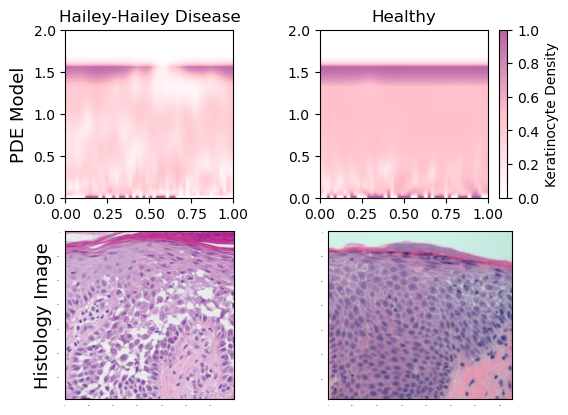

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)


im1 = axes[0,0].imshow(H_unstable[25:height,50:100],extent=(0,1,0,2), cmap=custom_cmap,aspect='0.5')
im2 = axes[0,1].imshow(H[25:height,50:100], extent=(0,1,0,2), cmap=custom_cmap,aspect='0.5')

axes[1,0].imshow(HHD)
axes[1,1].imshow(healthy)


axes[0,0].set_ylabel('PDE Model',fontsize=13)
fig.colorbar(im2,label='Keratinocyte Density')

axes[0,0].set_title('Hailey-Hailey Disease')
axes[0,1].set_title('Healthy')

axes[1,0].tick_params(size = 0, labelsize = 0)
axes[1,1].tick_params(size = 0, labelsize = 0)
axes[1,0].set_ylabel('Histology Image',fontsize=13)

plt.savefig('panel_fig')

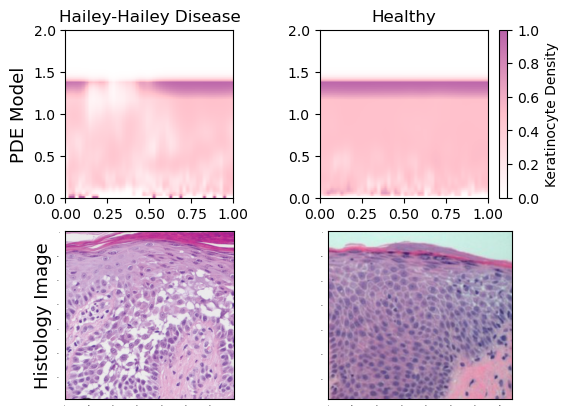

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)


im1 = axes[0,0].imshow(H_unstable[25:height,50:100],extent=(0,1,0,2), cmap=custom_cmap,aspect='0.5')
im2 = axes[0,1].imshow(H[25:height,50:100], extent=(0,1,0,2), cmap=custom_cmap,aspect='0.5')

axes[1,0].imshow(HHD)
axes[1,1].imshow(healthy)


axes[0,0].set_ylabel('PDE Model',fontsize=13)
fig.colorbar(im2,label='Keratinocyte Density')

axes[0,0].set_title('Hailey-Hailey Disease')
axes[0,1].set_title('Healthy')

axes[1,0].tick_params(size = 0, labelsize = 0)
axes[1,1].tick_params(size = 0, labelsize = 0)
axes[1,0].set_ylabel('Histology Image',fontsize=13)

plt.savefig('panel_fig')

metadata = dict(title='Movie', artist='Jack')
writer = FFMpegWriter(fps=50,metadata=metadata)


with writer.saving(fig,'PDE_sim_with_histology.gif',100):
    for i in range(1,T):
        H_unstable=update_H(H_unstable)
        H=update_H(H)
    
        cluster=16
        if i%5==0:
            H[height-1,0:width]=0
            H_unstable[height-1,0:width]=0
            
            cluster=16
            for n in np.random.randint(0,width-cluster,size=[6,]):
                H_unstable[height-1,n:n+cluster]=np.random.uniform(0,1,size=[cluster,])>0.5
                
            cluster=32
            for n in np.random.randint(0,width-cluster,size=[6,]):
                H[height-1,n:n+cluster]=np.random.uniform(0,1,size=[cluster,])>0.5
        
        
        im1.set_data(H_unstable[15:height,50:100])
        im2.set_data(H[15:height,50:100])
        writer.grab_frame()